# Project 01 - Choose Your Own Analysis
## Hypothesis: I believe that students who have had more programming experience are more likely to recommend the course.

In [2]:
__author__ = "730384041"

## Since my Jupyter Notebook kernel is running the entire time I am working on functions in `data_utils.py`, I will use a special extension to automatically reload any changes I make and save in modules I import. The special conventions in the cell below are turning this feature on.

In [3]:
%reload_ext autoreload
%autoreload 2

## Data files will be stored in the `data` directory of the workspace. This Notebook is located in `projects/pj01` directory. The constant `DATA_DIRECTORY` defined below uses the convention of two dots to refer to "one directory up", so it is a `str` that references the `data` directory relative to this project's directory. Then, another constant is established referencing the path to the data file I will use to test my functions in this project.

In [1]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

## First I will read in the csv and convert it to a column-oriented data table.

In [4]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## Next, I will select just the prior_exp column. Here are the first five rows:

In [13]:
from data_utils import select, head

prior_exp_subset: dict[str, list[str]] = select(columns, ["prior_exp"])
head(prior_exp_subset, 5)

{'prior_exp': ['None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!']}

## Now I will select just the would_recommend column. Here are the first five rows:

In [14]:
from data_utils import select, head
would_rec_subset: dict[str, list[str]] = select(columns, ["would_recommend"])
head(would_rec_subset, 5)

{'would_recommend': ['7', '7', '7', '7', '7']}

## Next, I will count up the totals of each response for prior_exp.

In [16]:
from data_utils import count
exp_counts = count(prior_exp_subset["prior_exp"])

print(f"None to less than one month total is: {exp_counts['None to less than one month!']}")
print(f"2-6 months total is: {exp_counts['2-6 months']}")
print(f"7-12 months total is: {exp_counts['7-12 months']}")
print(f"1-2 years total is: {exp_counts['1-2 years']}")
print(f"Over 2 years total is: {exp_counts['Over 2 years']}")

None to less than one month total is: 403
2-6 months total is: 104
7-12 months total is: 37
1-2 years total is: 18
Over 2 years total is: 11


## Now I will count up the totals of each response for would_recommend.

In [17]:
from data_utils import count
rec_counts = count(would_rec_subset["would_recommend"])

print(f"1/7 likelihood to recommend total is: {rec_counts['1']}")
print(f"2/7 likelihood to recommend total is: {rec_counts['2']}")
print(f"3/7 likelihood to recommend total is: {rec_counts['3']}")
print(f"4/7 likelihood to recommend total is: {rec_counts['4']}")
print(f"5/7 likelihood to recommend total is: {rec_counts['5']}")
print(f"6/7 likelihood to recommend total is: {rec_counts['6']}")
print(f"7/7 likelihood to recommend total is: {rec_counts['7']}")

1/7 likelihood to recommend total is: 12
2/7 likelihood to recommend total is: 16
3/7 likelihood to recommend total is: 34
4/7 likelihood to recommend total is: 88
5/7 likelihood to recommend total is: 92
6/7 likelihood to recommend total is: 134
7/7 likelihood to recommend total is: 197


## Then, I will count up the occurrences of each combination of response for prior_exp and would_recommend.

In [20]:
from data_utils import combinations
combos = combinations(columns, "prior_exp", "would_recommend")
print(combos)

{'None to less than one month! and 7/7': 112, 'Over 2 years and 4/7': 1, 'None to less than one month! and 6/7': 85, 'None to less than one month! and 4/7': 76, 'None to less than one month! and 5/7': 73, '2-6 months and 5/7': 16, '7-12 months and 7/7': 20, 'None to less than one month! and 1/7': 12, 'None to less than one month! and 3/7': 31, '2-6 months and 7/7': 49, '2-6 months and 6/7': 29, 'None to less than one month! and 2/7': 14, '1-2 years and 6/7': 6, '2-6 months and 4/7': 6, '7-12 months and 6/7': 11, '1-2 years and 7/7': 11, '2-6 months and 3/7': 2, 'Over 2 years and 7/7': 5, 'Over 2 years and 6/7': 3, 'Over 2 years and 5/7': 2, '2-6 months and 2/7': 2, '7-12 months and 4/7': 4, '7-12 months and 5/7': 1, '1-2 years and 4/7': 1, '7-12 months and 3/7': 1}


## Next, I will make a bar chart of this data using seaborn. The x-axis labels are difficult to read due to the large amount of combinations of programming experience and , but the 5 distinct sections of 7 bars represent levels prior experience, increasing from left to right. The individual bars represent the number of students for each experience level that responded with a certain likelihood to recommend the course out of 7, also increasing from left to right.

<AxesSubplot:>

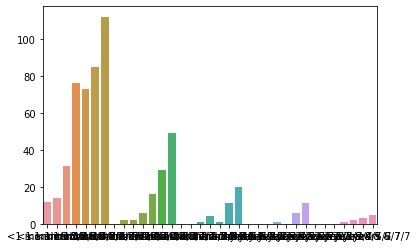

In [25]:
import seaborn
seaborn.barplot(x=["<1 month & 1/7", "<1 month & 2/7", "<1 month & 3/7", "<1 month & 4/7", "<1 month & 5/7", "<1 month & 6/7", "<1 month & 7/7", "2-6 months & 1/7", "2-6 months & 2/7", "2-6 months & 3/7", "2-6 months & 4/7", "2-6 months & 5/7", "2-6 months & 6/7", "2-6 months & 7/7", "7-12 months & 1/7", "7-12 months & 2/7", "7-12 months & 3/7", "7-12 months & 4/7", "7-12 months & 5/7", "7-12 months & 6/7", "7-12 months & 7/7", "1-2 years & 1/7", "1-2 years & 2/7", "1-2 years & 3/7", "1-2 years & 4/7", "1-2 years & 5/7", "1-2 years & 6/7", "1-2 years & 7/7", ">2 years & 1/7", ">2 years & 2/7", ">2 years & 3/7", ">2 years & 4/7", ">2 years & 5/7", ">2 years & 6/7", ">2 years & 7/7"], y=[12, 14, 31, 76, 73, 85, 112, 0, 2, 2, 6, 16, 29, 49, 0, 0, 1, 4, 1, 11, 20, 0, 0, 0, 1, 0, 6, 11, 0, 0, 0, 1, 2, 3, 5])

## Lastly, I will make a bar chart using seaborn of the percentage of responses above 4/7 for likelihood to recommend the course for each level of prior experience in programming.

<AxesSubplot:>

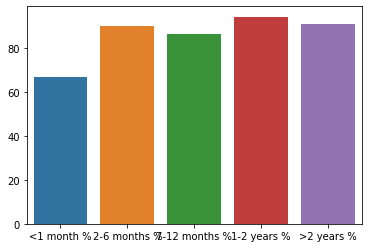

In [24]:
import seaborn
seaborn.barplot(x=["<1 month %", "2-6 months %", "7-12 months %", "1-2 years %", ">2 years %"], y=[67.00, 90.38, 86.49, 94.44, 90.91])

## Conclusions:
### My hypothesis that students who have had more programming experience will be more likely to recommend the course was proven by my analysis of survey data. The second bar chart that I created showed a more comprehensive display of the results I came to when conducting my analysis, and reveals key points to consider in my analysis. The distribution of percentages of students that have a relatively high likelihood to recommend the course among different levels of experience in coding appears somewhat uniform, but students with more programming experience clearly have a higher likelihood to recommend the course than those with less programming experience. Thus, my reasoning that students with more programming experience will have greater enjoyment of the course due to their lack of difficulty with the material was shown to be accurate.